# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [52]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import seaborn as sns
from textwrap import wrap

In [53]:
# Get CSV files from historic values of goods exported and 
# imported from Argentina in the 2000 - 2022 period
# source https://estadisticas.mercosur.int/
files = [file for file in sorted(os.listdir('source_data'))]

df_list_export = []
df_list_import = []

# Append all files
for file in files:
    if file.startswith("export"):
        df_export = pd.read_csv('source_data/' + file, on_bad_lines='skip', skipfooter=1).sort_values(by='Total', ascending=False)
        df_list_export.append(df_export)
    elif file.startswith("import"):
        df_import = pd.read_csv('source_data/' + file, on_bad_lines='skip', skipfooter=1).sort_values(by='Total', ascending=False)
        df_list_import.append(df_import)

# Make common dataframe with (country | Total amout (USD - FOB) export per year)
df = pd.DataFrame(df_list_export[0])
for i in range(len(df_list_export)):
    if i != len(df_list_export)-1:
        df = pd.merge(df, df_list_export[i+1], how='inner', on='Category')
    else:
        pass

# Set year as axis
df_export = df.set_axis(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
             '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis=1).set_index('Country')

# Make common dataframe with (country | Total amout (USD - FOB) import per year)
df = pd.DataFrame(df_list_import[0])
for i in range(len(df_list_import)):
    if i != len(df_list_import)-1:
        df = pd.merge(df, df_list_import[i+1], how='inner', on='Category')
    else:
        pass

# Set year as axis
df_import = df.set_axis(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
             '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis=1).set_index('Country')

# Define dataframe for plotting
df_global = pd.DataFrame()
df_global['Total export FOB (USD)'] = df_export.sum()
df_global['Total import FOB (USD)'] = df_import.sum()
df_global['Balance FOB (USD)'] = df_export.sum() - df_import.sum()

# Get CSV files from historic interantionl value of soy price in the 2000 - 2022 period
df_soy = pd.read_csv('source_data/Historic_soy_price.csv', on_bad_lines='skip', names=['Date', 'Price (USD per ton)'], header=None)
df_soy['Date'] = df_soy['Date'].str.replace('\D+', '')
df_soy['Price (USD per ton)'] = pd.to_numeric(df_soy['Price (USD per ton)'].str.replace(',', '.'))
df_soy = df_soy.groupby('Date')['Price (USD per ton)'].mean()

In [83]:
#df_import.to_csv('source_data/import_2000-2022.csv')
#df_export.to_csv('source_data/export_2000-2022.csv')
#df_soy.to_csv('source_data/soybeans_price_2000-2022.csv')

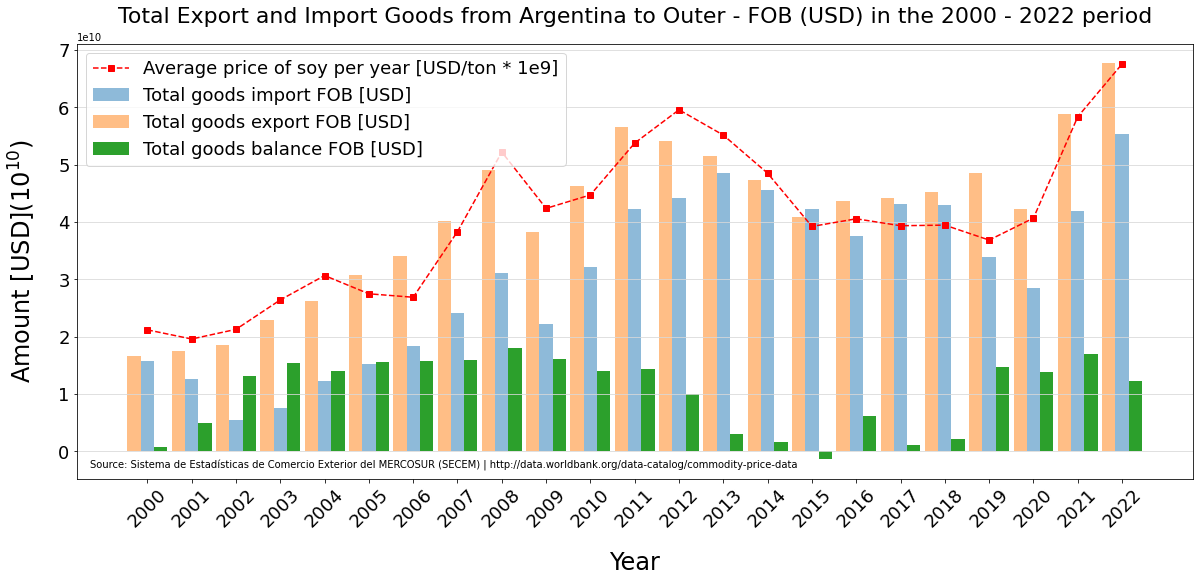

In [81]:
# Make a figure
fig, ax = plt.subplots(figsize=(20,8))

# Import bar plot
xval = np.arange(1,24,1)
ax.bar(xval, df_global['Total import FOB (USD)'], width=0.3, label='Total goods import FOB [USD]', alpha=0.5)
# Export bar plot
xval2 = xval - 0.3
ax.bar(xval2, df_global['Total export FOB (USD)'], width=0.3, label='Total goods export FOB [USD]', alpha=0.5)
# Balance bar plot
xval3 = xval + 0.3
ax.bar(xval3, df_global['Balance FOB (USD)'], width=0.3, label='Total goods balance FOB [USD]')
# Average soy price per year
ax.plot(xval, df_soy*1e8, '--rs', label='Average price of soy per year [USD/ton * 1e9]')

# Set graph attributes
ax.set_xticks(np.arange(1,24,1), [x for x in df_global.index])
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(45)
ax.tick_params(labelsize=18)
ax.set_title('Total Export and Import Goods from Argentina to Outer - FOB (USD) in the 2000 - 2022 period', y=1.08, pad=-14, fontsize=22)
ax.legend(fontsize='18')
ax.set_xlabel('Year', fontsize='24', labelpad=20)
ax.set_ylabel('Amount [USD]$(10^{10})$', fontsize='24',labelpad=20)

ax.text(-0.3, -3000000000, 'Source: Sistema de Estadísticas de Comercio Exterior del MERCOSUR (SECEM) | http://data.worldbank.org/data-catalog/commodity-price-data')

plt.grid(axis='y', color='0.85')


#fig.savefig('Export_Import_from_Arg.png', format='png', dpi=600, facecolor='white')

$\normalsize{\textbf{Total Export and Import Goods from Argentina to Outer - FOB (USD) in the 2000 - 2022 period}}$

$\color{red}{\text{Q: How Argentina´s economy strongly depends on the global (FOB) price of the soybeans, regardless of political changes over the years?}}$

Argentina´s economy strongly depends on the agricultural production, being the most important goods the soy beans, together with other kinds of beans. Over the years, different parties (from right and left wind) governed the country, taking drastic measures related to the global economic. One of the most _intense_ debates was the over taxes to the agricultural sector for _speculating_ on when to sell their production. Because beans are commodities, their prices are set globally by the market, in this case, the Chicago Board of Trade (CBOT). When the prices of the beans goes down, the agricultural sector would tried to stock the beans to wait for a better price, which for sure will affect the country economy. Altough this is for sure a more complex debate, the graph shows the total import, export and balance of the goods, from Argentina to Outer, in the 2000 - 2022 period, in comparison with the global average price of the soy beans per year. One can clearly see that, in Argentina, with such an strong and important market as the agricultural production, no only the total export would be marked by the global price of the soy beans, but also the annual balance of the profits. Altough other kinds of markets are gaining importance lately in Argentina´s economy, the country is still very much dependent on the global price of beans.

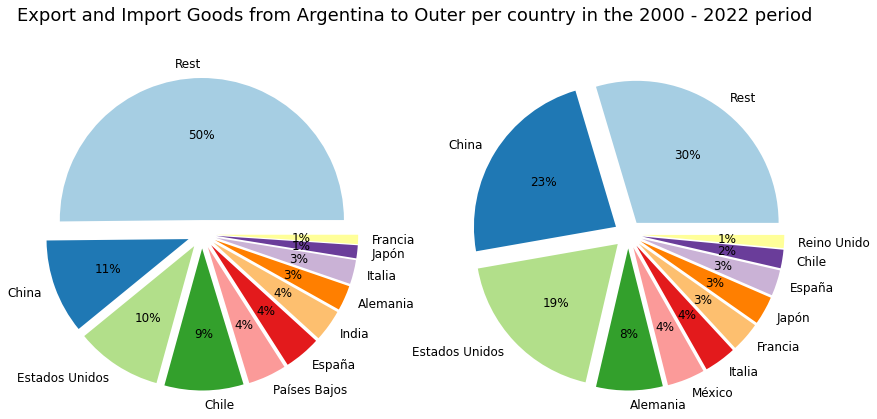

In [55]:
# Clean export import df for pie chart for the "more important" first 10 countries
df_pie_import = df_import.sum(axis=1).iloc[:10]
df_pie_import['Rest'] = df_import.sum(axis=1).iloc[10:].sum()
# Total import goods per country over the 2000-2022 period
df_pie_import = df_pie_import.sort_values(ascending=False)

df_pie_export = df_export.sum(axis=1).iloc[:10]
df_pie_export['Rest'] = df_export.sum(axis=1).iloc[10:].sum()
# Total import goods per country over the 2000-2022 period
df_pie_export = df_pie_export.sort_values(ascending=False)

# Create subplots for import and export
fig, ax = plt.subplots(1,2,figsize=(14,10))
ax[0].pie(df_pie_export, 
        labels = df_pie_export.index, 
        autopct='%1.0f%%', 
        explode = ([0.1]*11), 
        textprops={'fontsize':12}, 
        colors = sns.color_palette("Paired"));
ax[0].set_title('Export and Import Goods from Argentina to Outer per country in the 2000 - 2022 period', x=1.1, y=1.1, pad=1, fontsize=18)

ax[1].pie(df_pie_import, 
        labels = df_pie_import.index, 
        autopct='%1.0f%%', 
        explode = ([0.1]*11), 
        textprops={'fontsize':12}, 
        colors = sns.color_palette("Paired"));

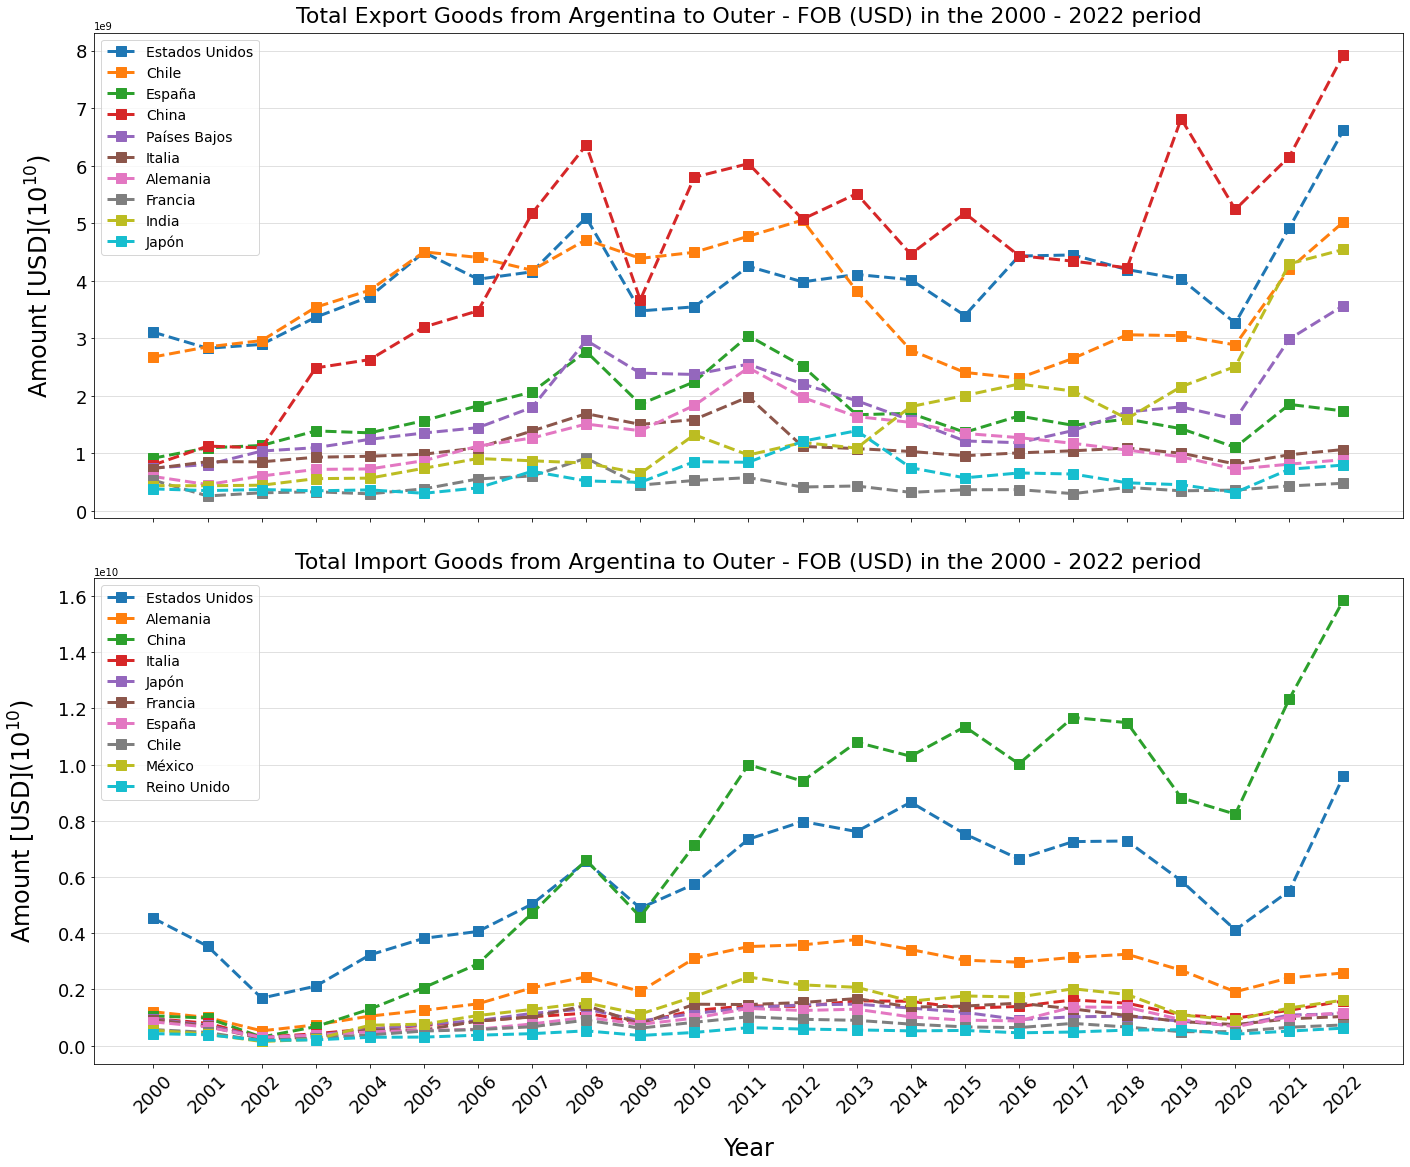

In [56]:
# Define color pallete
my_cmap = plt.cm.get_cmap('tab10').resampled(1000)

# Crete figure for Export and Import and Goods from Argentina to Outer - FOB (USD) in the 2000 - 2022 period per country
# for the 10 most important
count = 0
fig, ax = plt.subplots(2, 1, figsize=(20,16), sharex=True)
fig.tight_layout(pad=5.0)
for Country in df_export.head(10).index:
    ax[0].plot(df_export.loc[Country], '--rs', label=Country, color=my_cmap(count), linewidth=3, markersize=10)
    count += 100
for item in ax[0].xaxis.get_ticklabels():
    item.set_rotation(45)
ax[0].tick_params(labelsize=18)
ax[0].set_title('Total Export Goods from Argentina to Outer - FOB (USD) in the 2000 - 2022 period', y=1.05, pad=-14, fontsize=22)
ax[0].legend(fontsize='14')
#ax[0].set_xlabel('Year', fontsize='24', labelpad=20)
ax[0].set_ylabel('Amount [USD]$(10^{10})$', fontsize='24',labelpad=20)
ax[0].grid(axis='y', color='0.85')

count = 0
for Country in df_import.head(10).index:
    ax[1].plot(df_import.loc[Country], '--rs', label=Country, color=my_cmap(count), linewidth=3, markersize=10)
    count += 100
for item in ax[1].xaxis.get_ticklabels():
    item.set_rotation(45)
ax[1].tick_params(labelsize=18)
ax[1].set_title('Total Import Goods from Argentina to Outer - FOB (USD) in the 2000 - 2022 period', y=1.05, pad=-14, fontsize=22)
ax[1].legend(fontsize='14')
ax[1].set_xlabel('Year', fontsize='24', labelpad=20)
ax[1].set_ylabel('Amount [USD]$(10^{10})$', fontsize='24',labelpad=20)
ax[1].grid(axis='y', color='0.85')